In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("2021-dublin-city-cycle-counts.csv")
df['day_of_week'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%A'))
df['day_of_month'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%d'))
df['day_of_week_num'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%w'))
df['time_of_day'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%H'))
df['month'] = df['Date & Time'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S').strftime('%m'))
df = df.fillna(-1)

df.head(5)

def preprocessing(df):
    data = np.array(df)
    
    park_names = np.array(df.columns.values[1:-5])
    label_parks = data[:,1:-5]
    data_parks = data[:,-4:].astype(np.int64)
    
    len_parks = label_parks.shape[1]
    all_labels_parks = list()
    all_park_names = list()
    
    # Indices for days
#     monday_indices = np.where(data_parks[:,0] == 0)[0]
#     tuesday_indices = np.where(data_parks[:,0] == 1)[0]
#     wednesday_indices = np.where(data_parks[:,0] == 2)[0]
#     thursday_indices = np.where(data_parks[:,0] == 3)[0]
#     friday_indices = np.where(data_parks[:,0] == 4)[0]
#     saturday_indices = np.where(data_parks[:,0] == 5)[0]
#     sunday_indices = np.where(data_parks[:,0] == 6)[0]
    
    # Park Selection
    for i in range(len_parks):
        park = label_parks[:,i]
        indices_not_nan = np.where(park != -1)[0]
        indices_nan = np.where(park == -1)[0]
        if (len(indices_nan) < int( len(park) * 0.5)):

            for indice_nan in indices_nan:
                day = data_parks[indice_nan,0]
                time = data_parks[indice_nan,1]
                indices_mean = np.where((data_parks[:,0] == day) & (data_parks[:,1] == time))[0]
                park[indice_nan] = np.mean(park[indices_mean])
            all_labels_parks.append(park)
            all_park_names.append(park_names[i])
                
        
    return data_parks, np.array(all_labels_parks).reshape(label_parks.shape[0],-1), np.array(all_park_names)

# Data_parks columns = [day, hour, month]
# All_labels_parks columns = [Park1, Park2,.. etc]
data_parks, all_labels_parks, all_park_names = preprocessing(df)

df_train = pd.DataFrame(data_parks, columns=['day_of_month', 'day_of_week_num', 'time_of_day', 'month'])
df_label = pd.DataFrame(all_labels_parks, columns=all_park_names)

df_train.head(5)

df_label.head(5)





Bachelors walk/Bachelors way Bachelors walk/Bachelors way IN  \
0                         66.0                            18.0   
1                        206.0                           166.0   
2                         15.0                            10.0   
3                         74.0                            86.0   
4                         31.0                             4.0   

  Bachelors walk/Bachelors way OUT Baggot st lower/Wilton tce inbound  \
0                             11.0                                4.0   
1                            101.0                              122.0   
2                             36.0                                2.0   
3                             90.0                               75.0   
4                             35.0                                2.0   

  Baggot st lower/Wilton tce inbound Pedestrians IN  \
0                                              10.0   
1                                             127.0   
2                                               4.0   
3                                             105.0   
4                                               0.0   

  Baggot st lower/Wilton tce inbound Pedestrians OUT  \
0                                                3.0   
1                                              117.0   
2                                                6.0   
3                                               70.0   
4                                                5.0   

  Baggot st upper/Mespil rd/Bank  \
0                            6.0   
1                          172.0   
2                           55.0   
3                           74.0   
4                           27.0   

  Baggot st upper/Mespil rd/Bank Pedestrians IN  \
0                                           5.0   
1                                          97.0   
2                                         151.0   
3                                          65.0   
4                                          70.0   

  Baggot st upper/Mespil rd/Bank Pedestrians OUT  \
0                                           13.0   
1                                           66.0   
2                                          227.0   
3                                           45.0   
4                                          129.0   

  College Green/Bank Of Ireland  ... Talbot st/Guineys OUT  \
0                           8.0  ...                   6.0   
1                          44.0  ...                  57.0   
2                         159.0  ...                  37.0   
3                          25.0  ...                 140.0   
4                          58.0  ...                   3.0   

  Talbot st/Murrays Pharmacy Talbot st/Murrays Pharmacy IN  \
0                       68.0                          16.0   
1                      166.0                         119.0   
2                        7.0                          28.0   
3                       84.0                         250.0   
4                        0.0                           3.0   

  Talbot st/Murrays Pharmacy OUT Westmoreland Street East/Fleet street  \
0                            8.0                                  26.0   
1                          139.0                                 200.0   
2                           15.0                                  38.0   
3                          119.0                                 164.0   
4                            5.0                                  27.0   

  Westmoreland Street East/Fleet street IN  \
0                                    133.0   
1                                    103.0   
2                                     96.0   
3                                     70.0   
4                                     71.0   

  Westmoreland Street East/Fleet street OUT Westmoreland Street West/Carrolls  \
0                                     115.0                             159.0   
1                              

total lots:  84
Bachelors walk/Bachelors way
Desicion Tree Score
0.8957235675998948
Dummy Mean Score
0.0
Bachelors walk/Bachelors way IN
Desicion Tree Score
0.87026640803568
Dummy Mean Score
0.0
Bachelors walk/Bachelors way OUT
Desicion Tree Score
0.87780583723086
Dummy Mean Score
0.0
Baggot st lower/Wilton tce inbound
Desicion Tree Score
0.8796611383588104
Dummy Mean Score
0.0
Baggot st lower/Wilton tce inbound Pedestrians IN
Desicion Tree Score
0.8693155270003975
Dummy Mean Score
0.0
Baggot st lower/Wilton tce inbound Pedestrians OUT
Desicion Tree Score
0.8752503939352783
Dummy Mean Score
0.0
Baggot st upper/Mespil rd/Bank
Desicion Tree Score
0.8967447581300486
Dummy Mean Score
0.0
Baggot st upper/Mespil rd/Bank Pedestrians IN
Desicion Tree Score
0.9386129205494994
Dummy Mean Score
0.0
Baggot st upper/Mespil rd/Bank Pedestrians OUT
Desicion Tree Score
0.9600129253177536
Dummy Mean Score
0.0
College Green/Bank Of Ireland
Desicion Tree Score
0.9430894440559885
Dummy Mean Score
0.0
Coll

C:\Users\dmill\AppData\Local\Temp/ipykernel_7840/2534476821.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  sub_plt = plt.figure(fig_index).add_subplot(111)


Desicion Tree Score
0.9245285715790047
Dummy Mean Score
0.0
College Green/Bank Of Ireland OUT
Desicion Tree Score
0.9191671389397462
Dummy Mean Score
0.0
College Green/Church Lane
Desicion Tree Score
0.901769012134637
Dummy Mean Score
0.0
College Green/Church Lane IN
Desicion Tree Score
0.8717921904346514
Dummy Mean Score
0.0
College Green/Church Lane OUT
Desicion Tree Score
0.8762021692471943
Dummy Mean Score
0.0
College st/Westmoreland st
Desicion Tree Score
0.8688869486840307
Dummy Mean Score
0.0
College st/Westmoreland st IN
Desicion Tree Score
0.8675765267785535
Dummy Mean Score
0.0
College st/Westmoreland st OUT
Desicion Tree Score
0.8722141649248562
Dummy Mean Score
0.0
D'olier st/Burgh Quay
Desicion Tree Score
0.8937765045905193
Dummy Mean Score
0.0
D'olier st/Burgh Quay IN
Desicion Tree Score
0.9499164925479843
Dummy Mean Score
0.0
D'olier st/Burgh Quay OUT
Desicion Tree Score
0.9568734231140605
Dummy Mean Score
0.0
Dawson Street/Molesworth
Desicion Tree Score
0.95591765615347

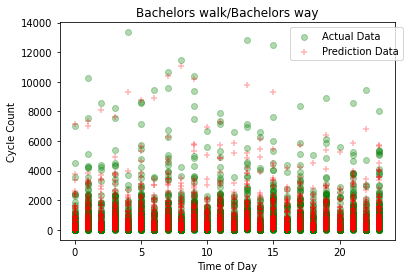

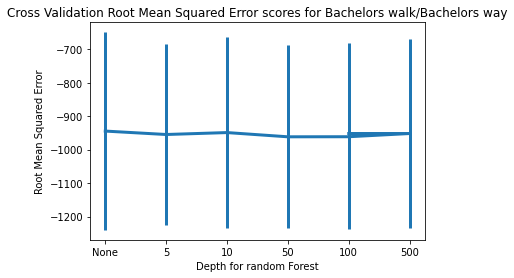

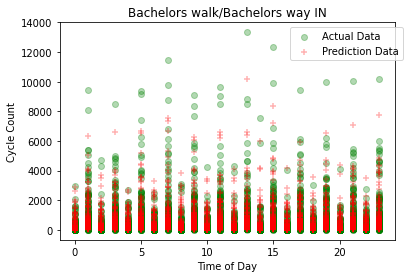

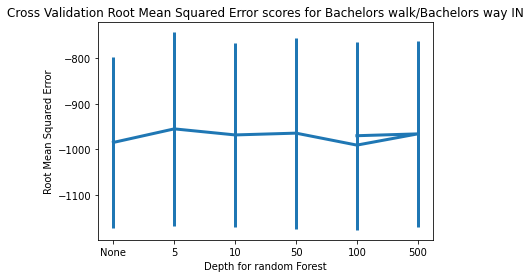

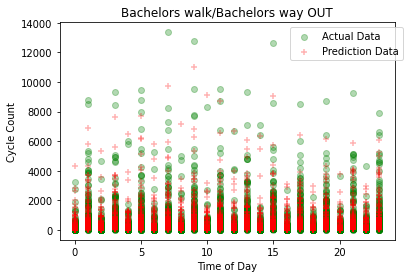

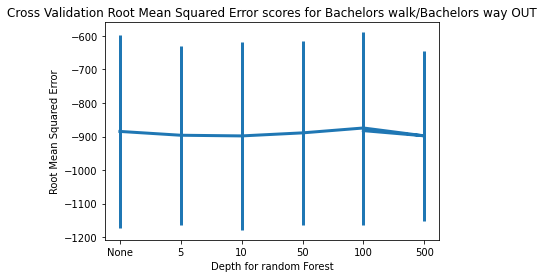

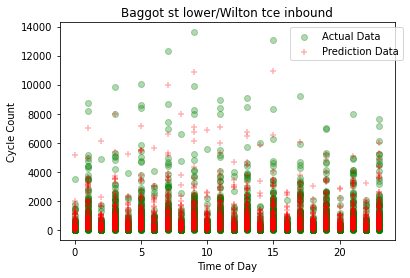

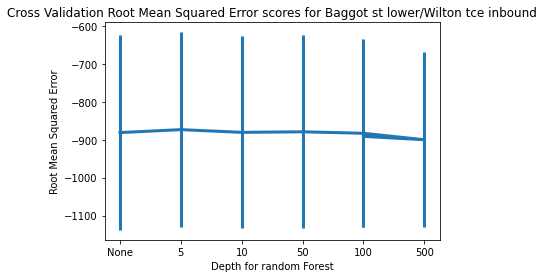

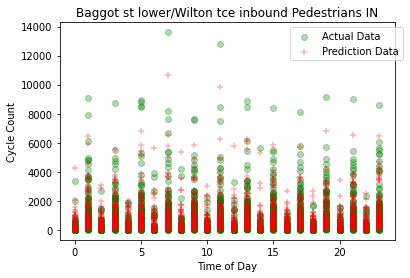

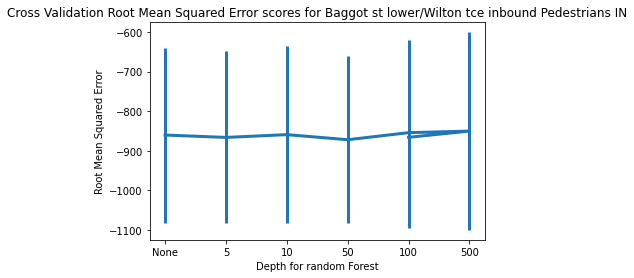

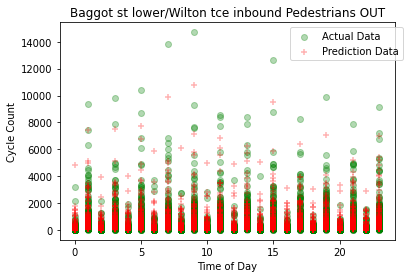

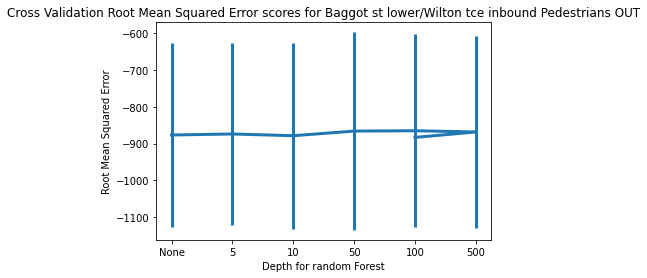

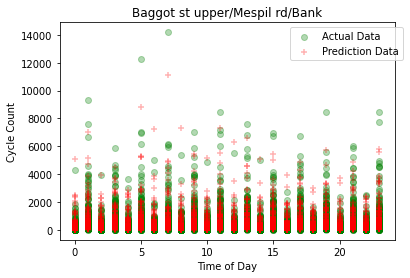

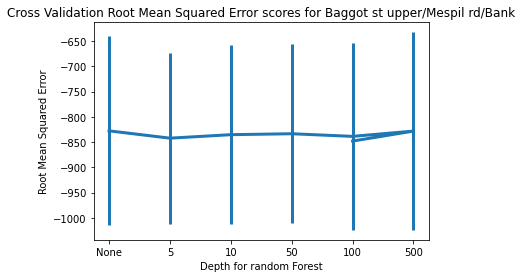

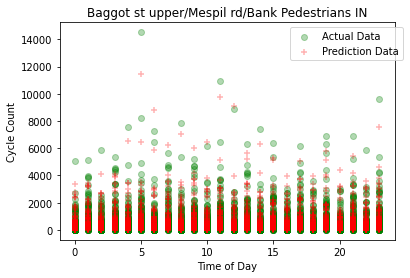

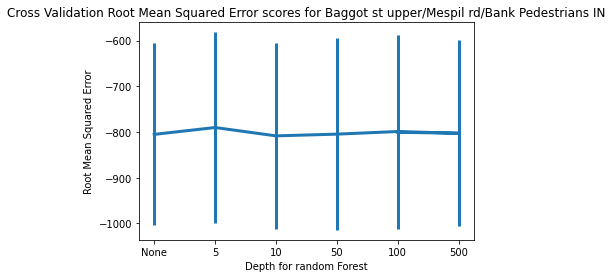

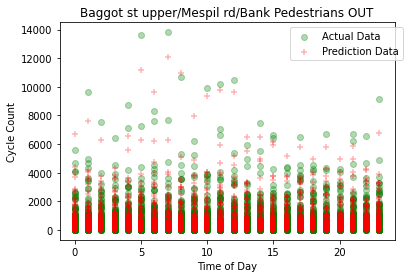

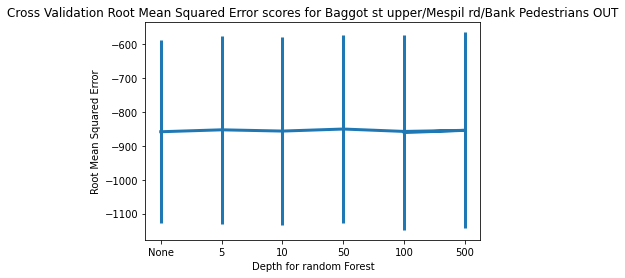

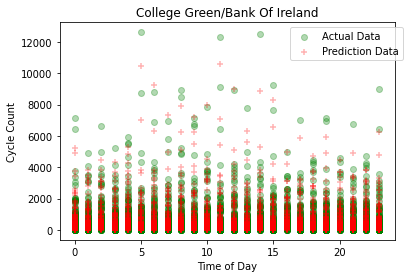

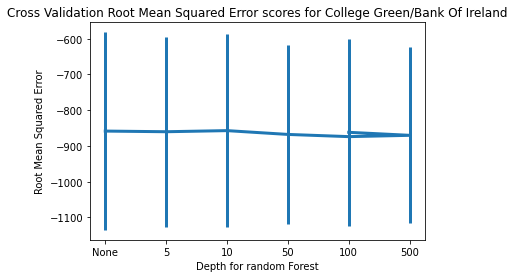

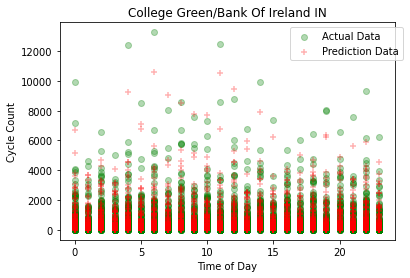

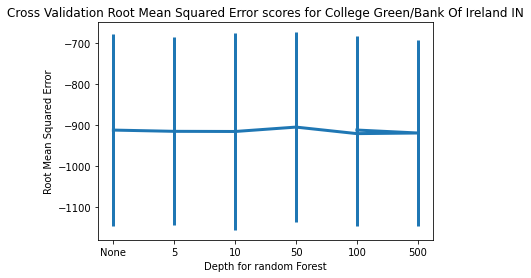

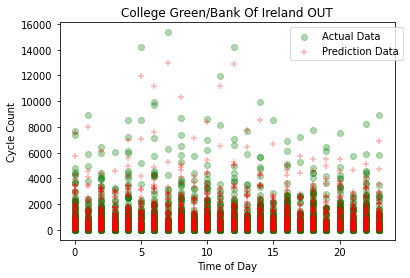

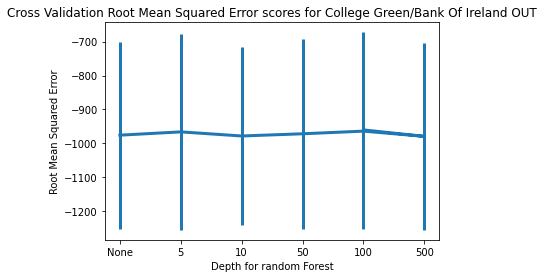

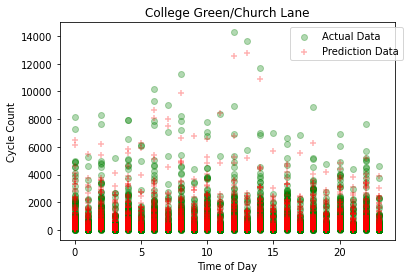

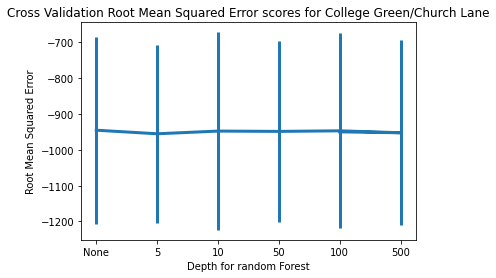

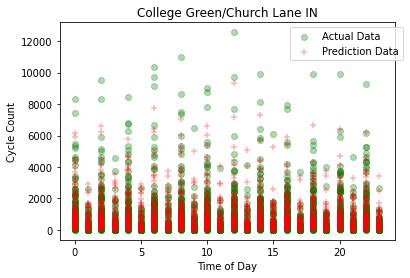

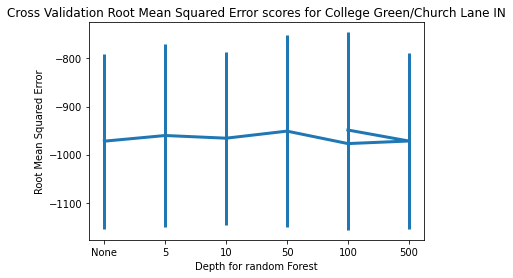

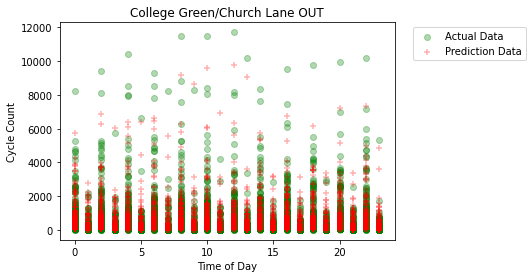

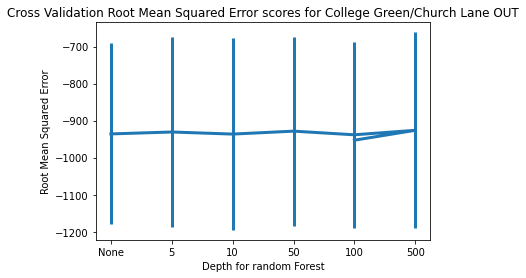

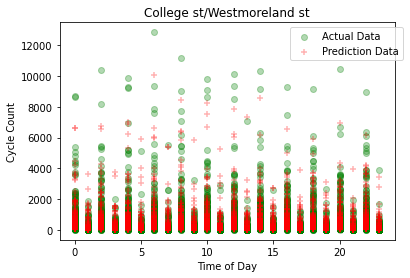

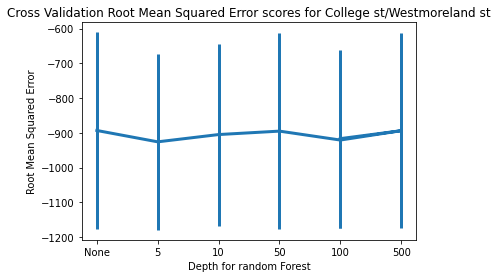

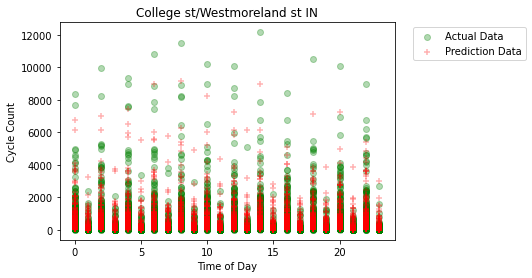

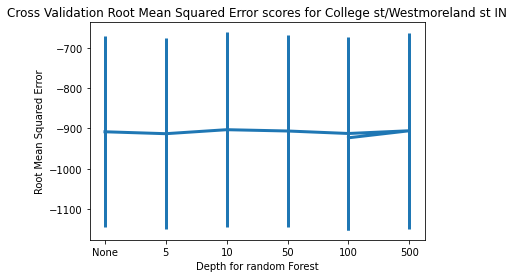

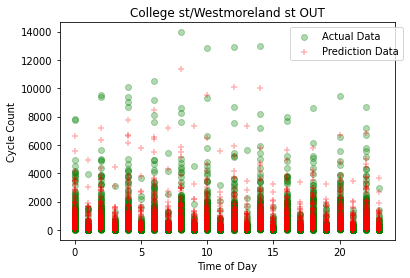

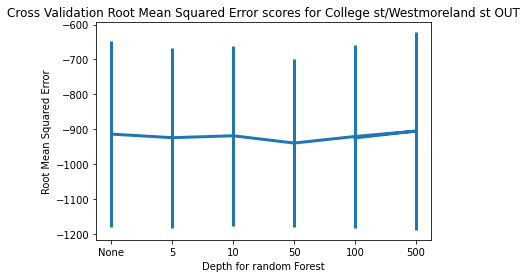

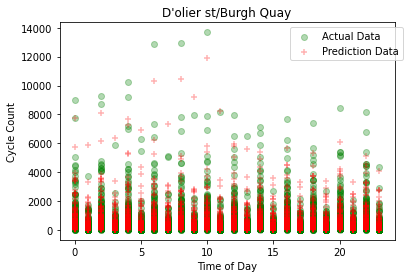

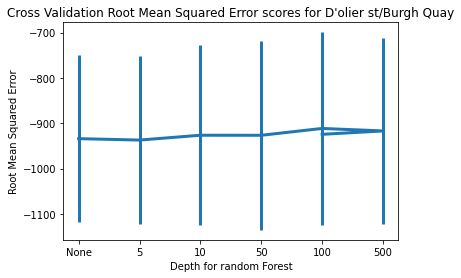

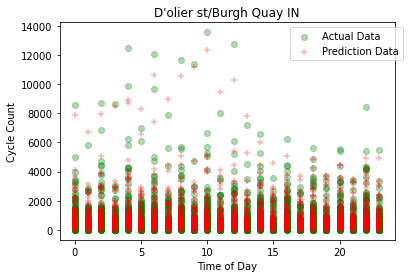

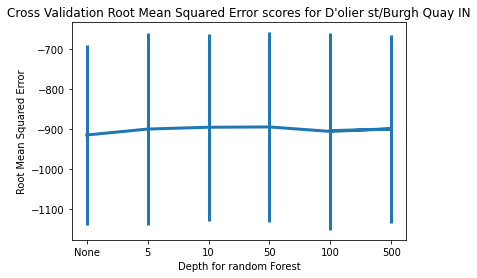

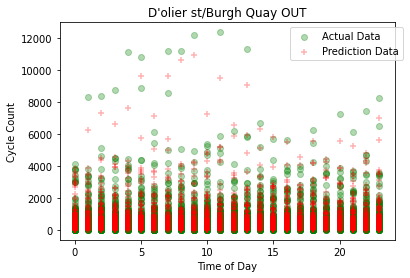

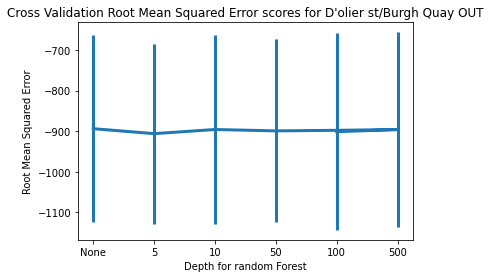

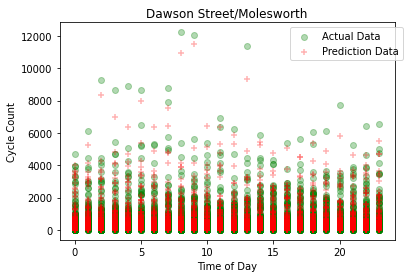

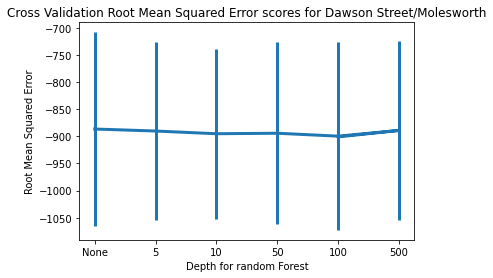

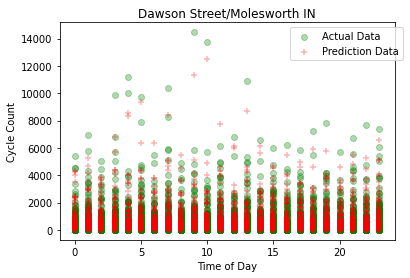

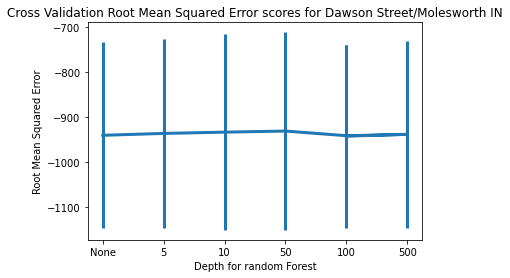

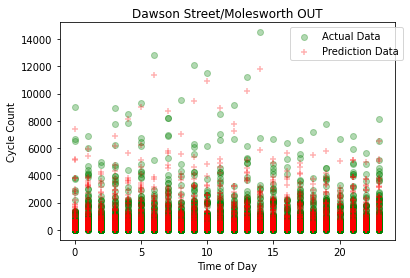

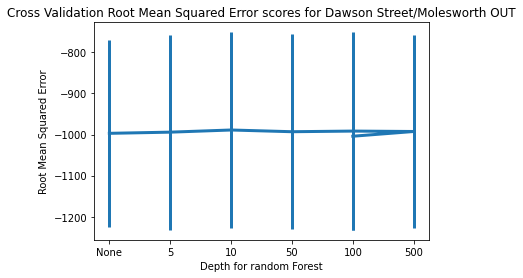

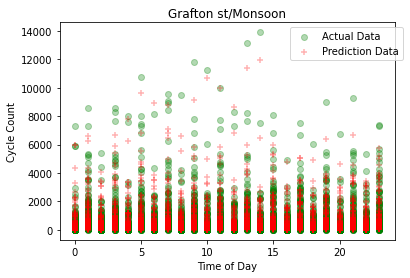

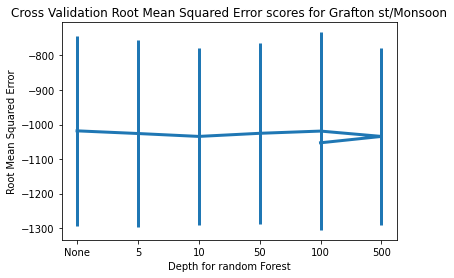

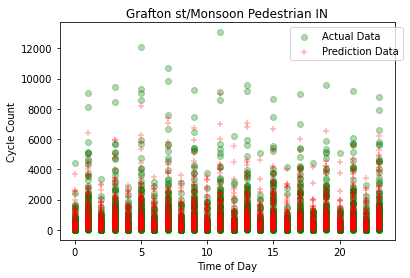

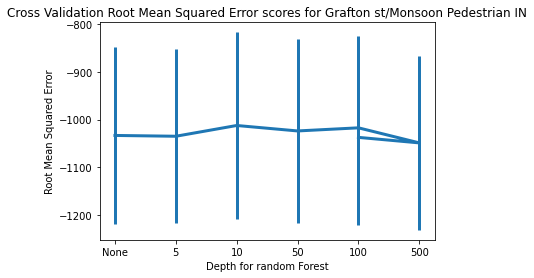

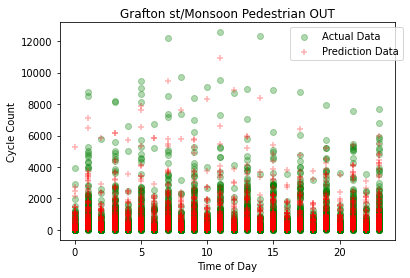

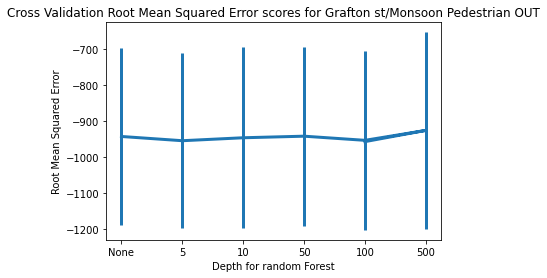

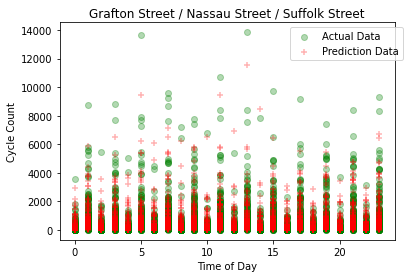

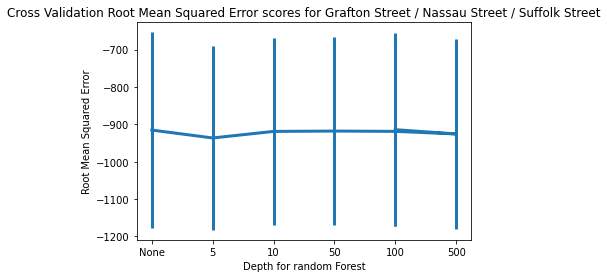

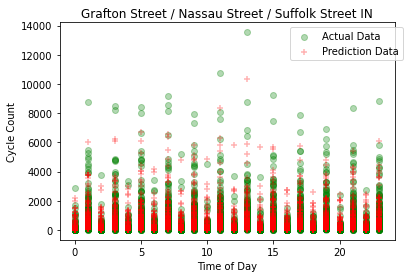

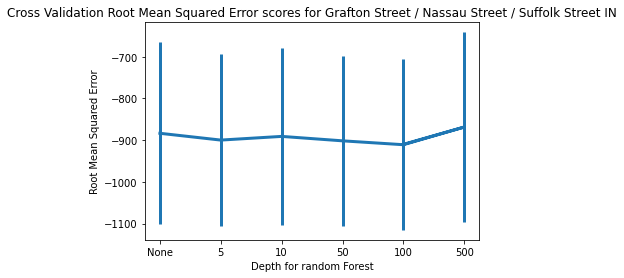

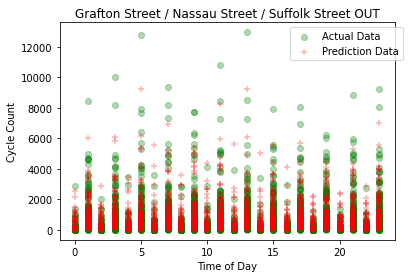

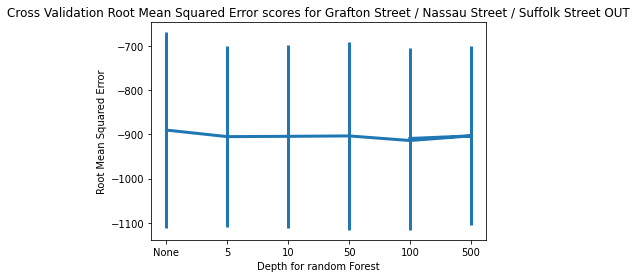

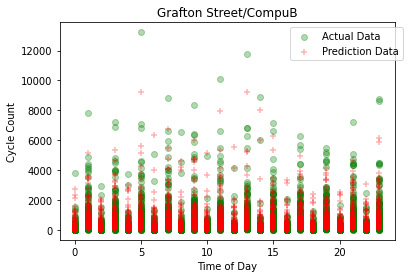

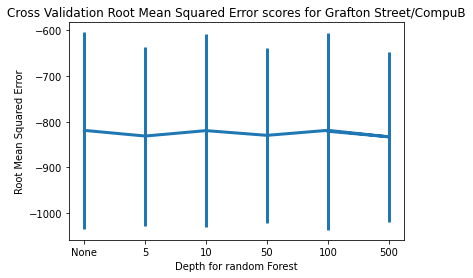

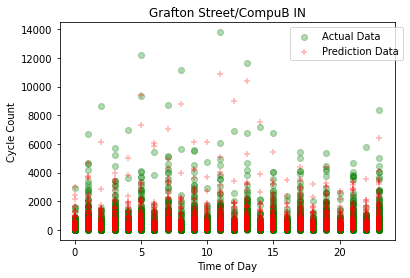

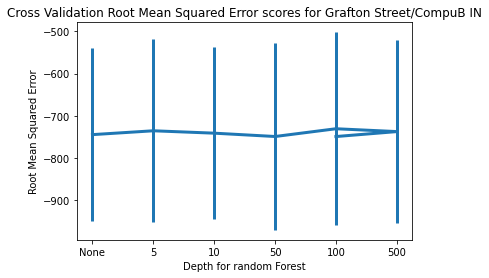

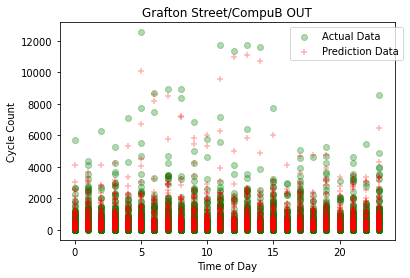

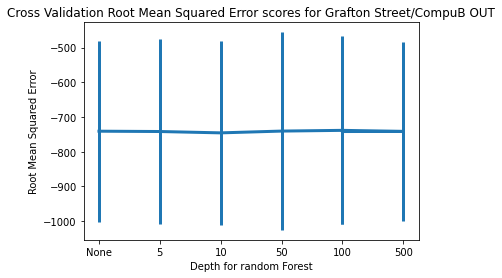

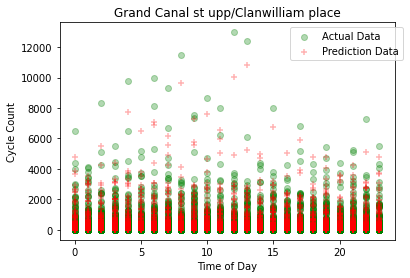

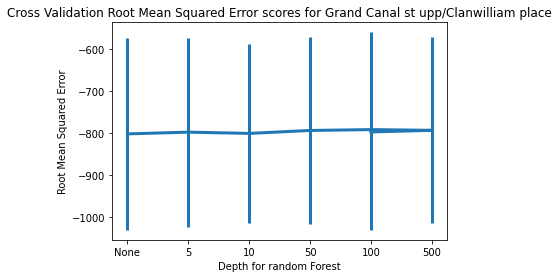

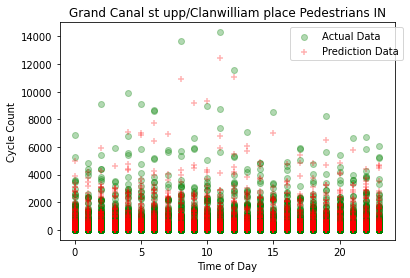

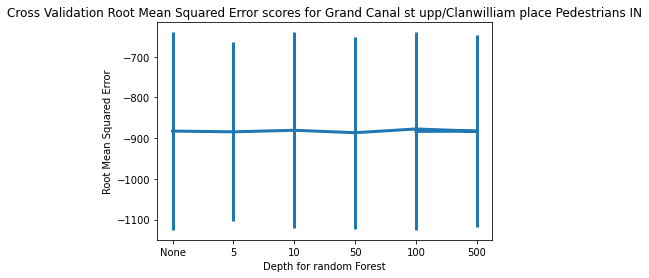

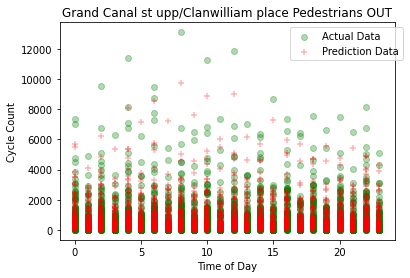

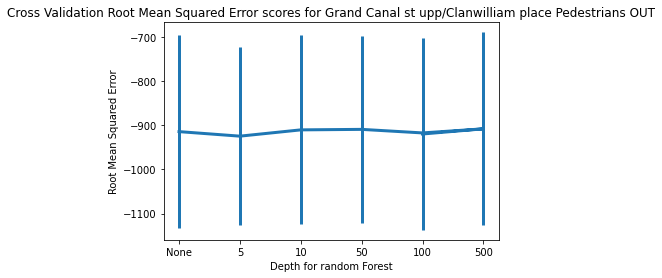

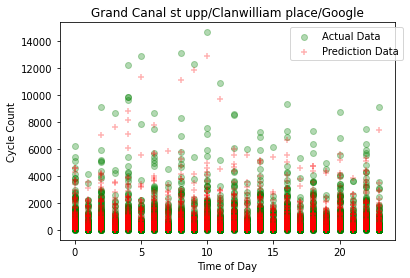

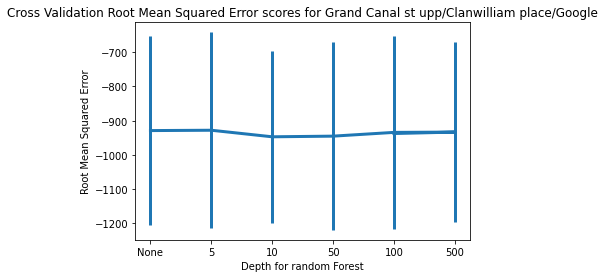

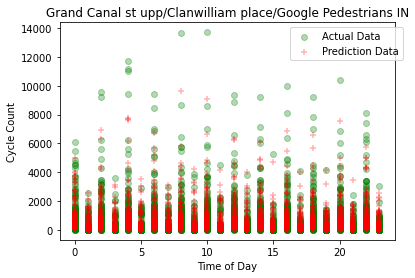

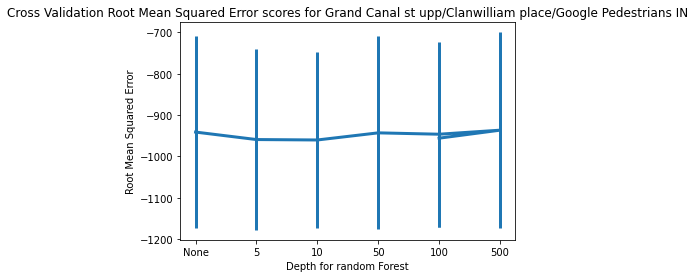

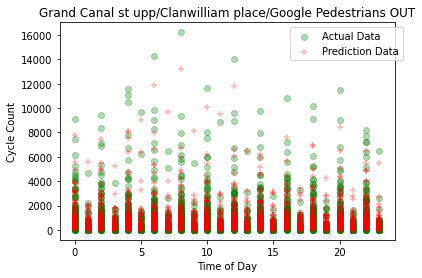

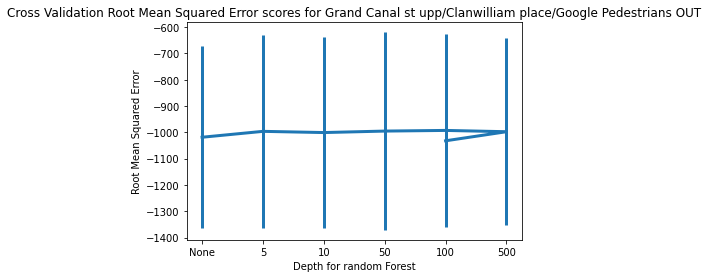

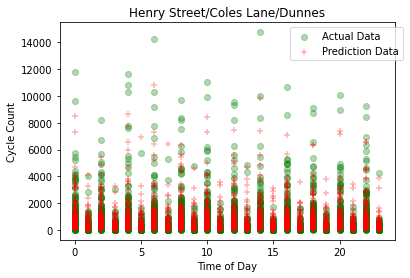

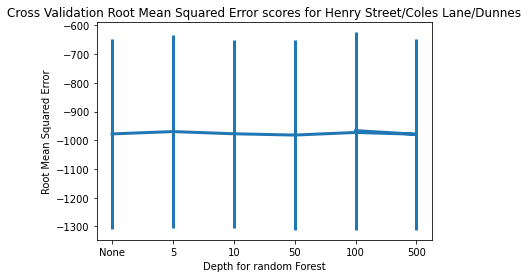

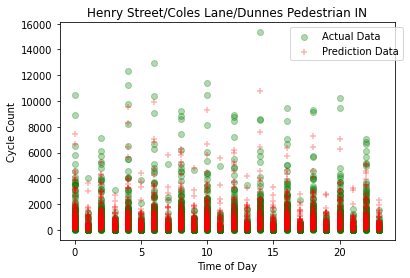

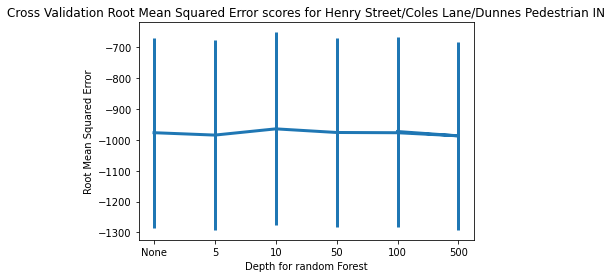

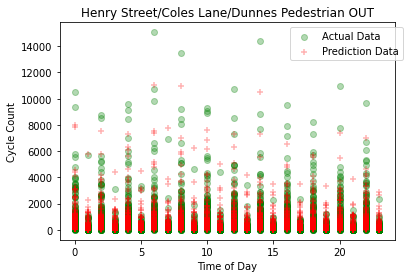

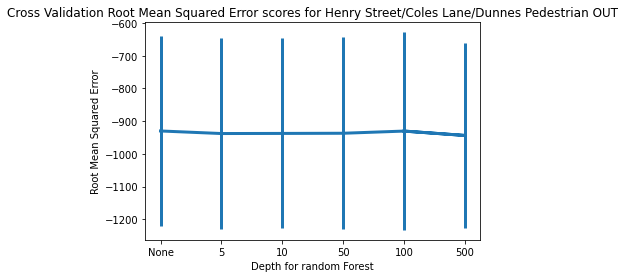

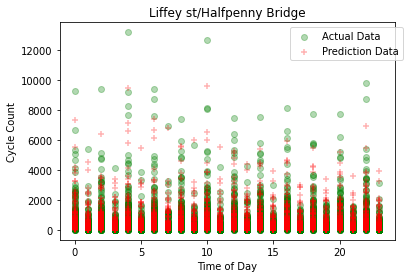

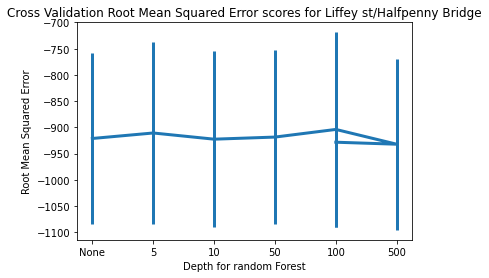

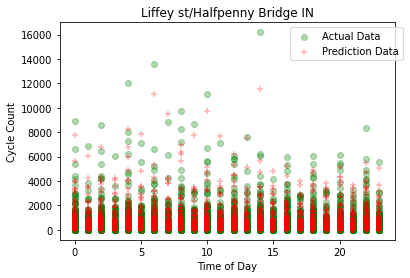

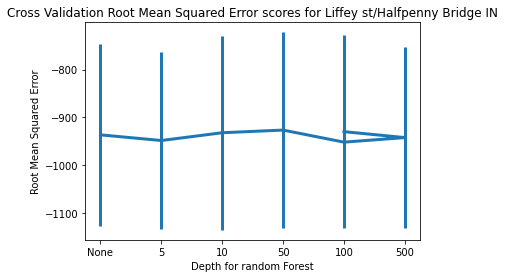

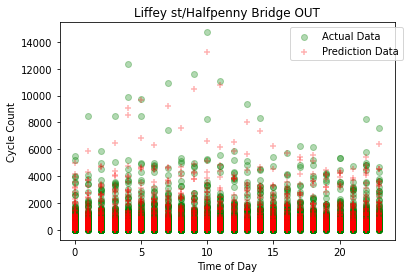

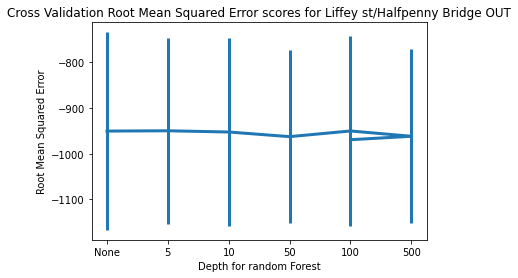

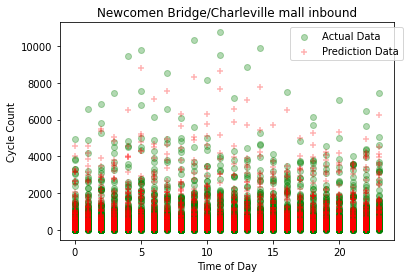

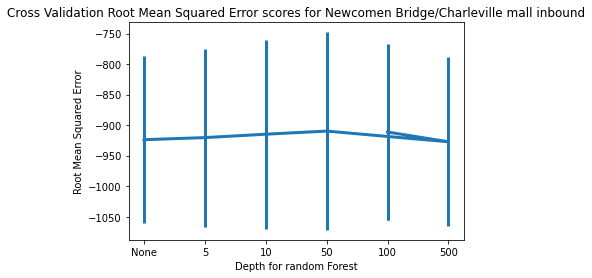

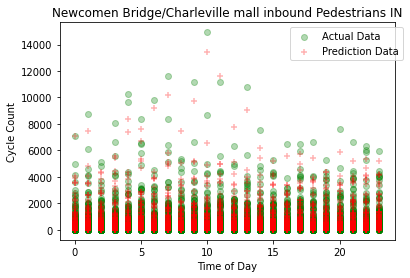

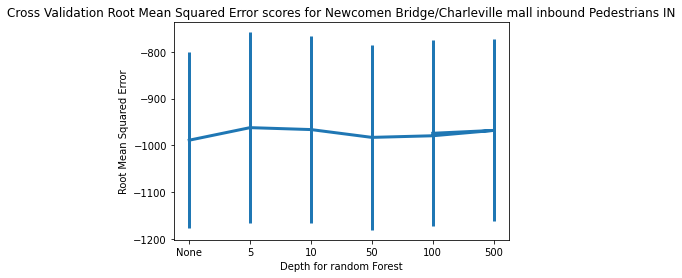

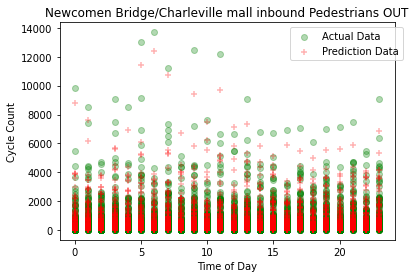

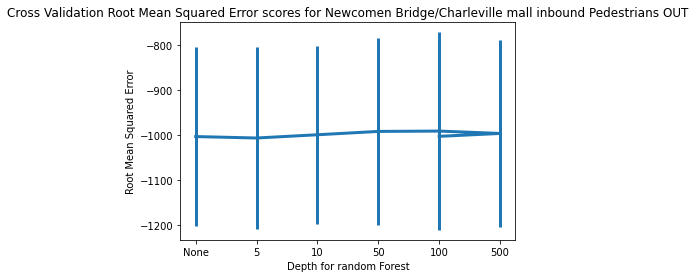

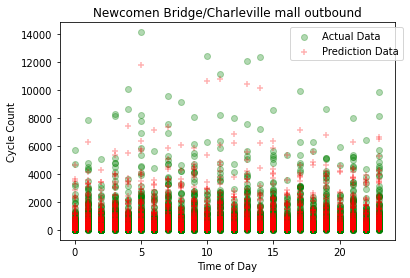

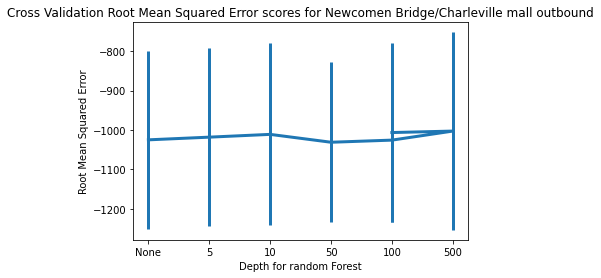

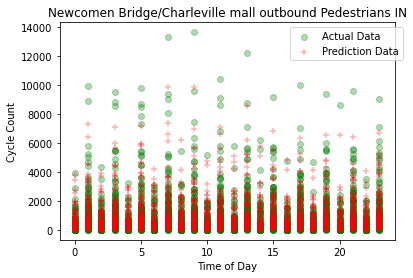

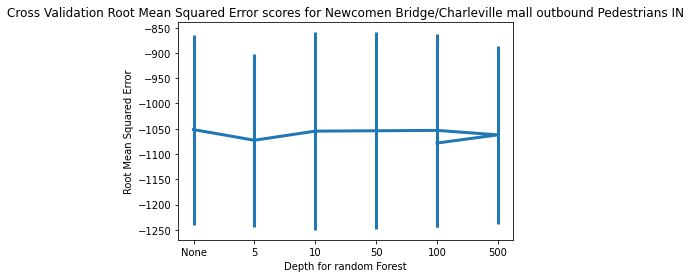

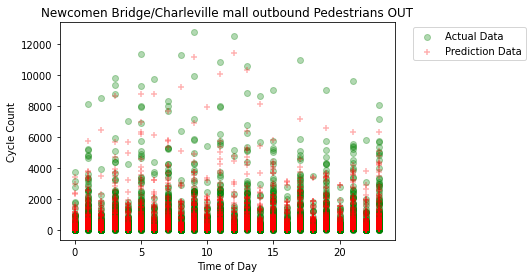

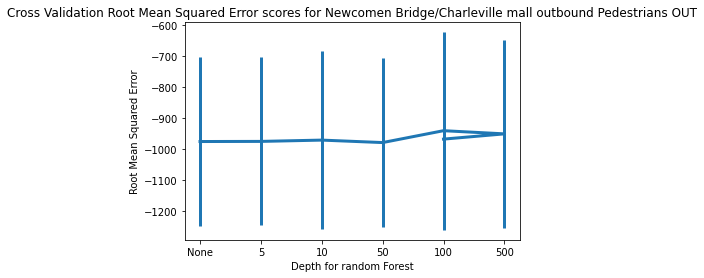

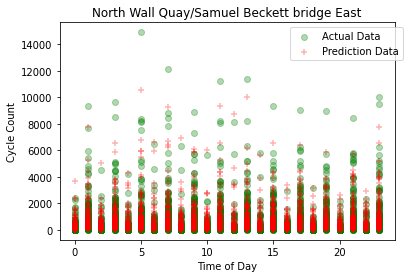

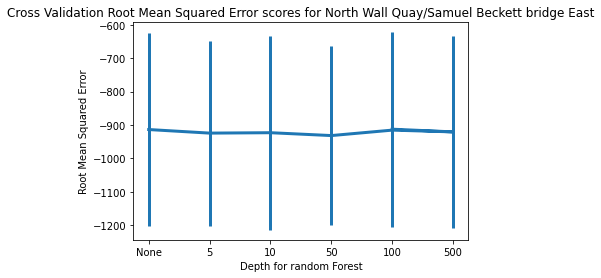

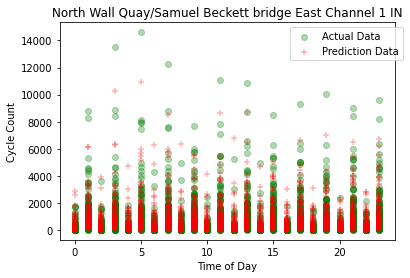

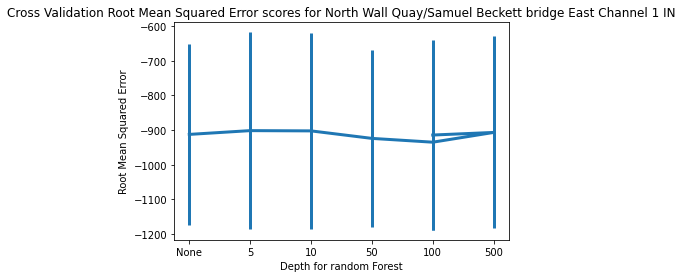

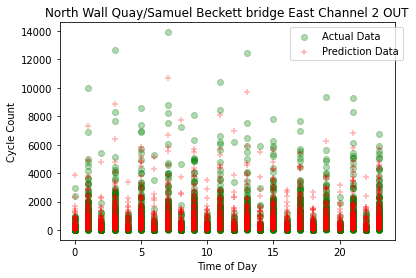

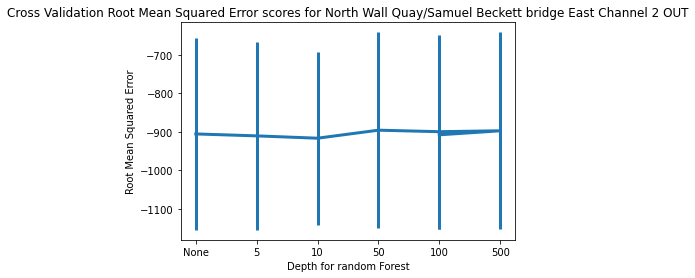

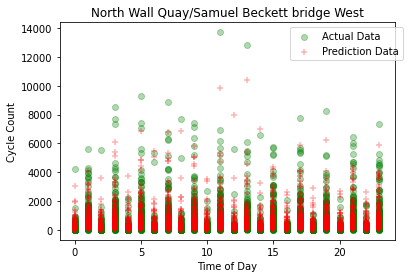

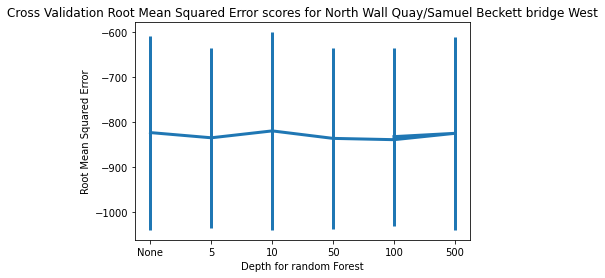

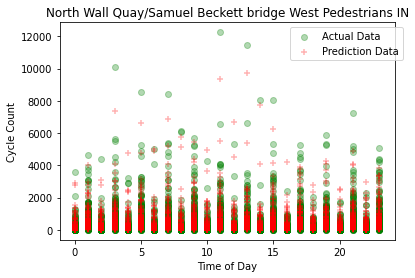

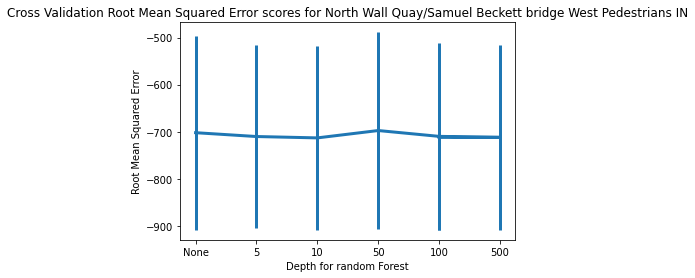

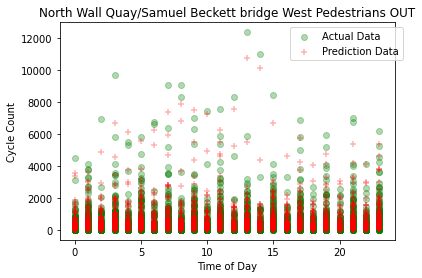

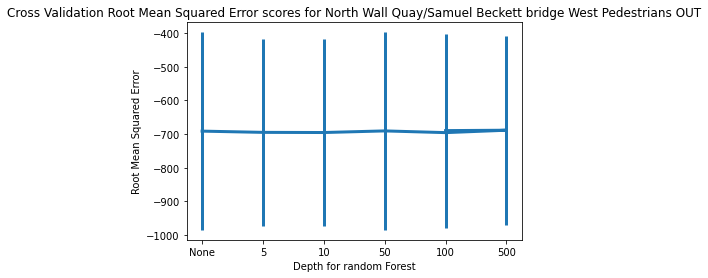

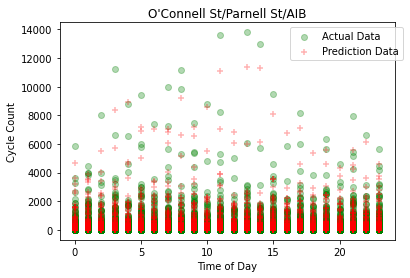

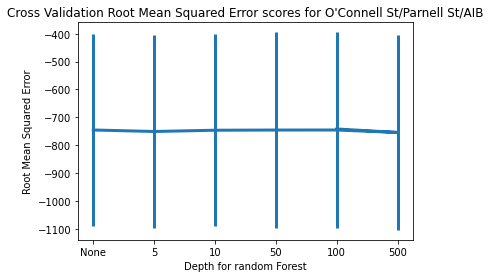

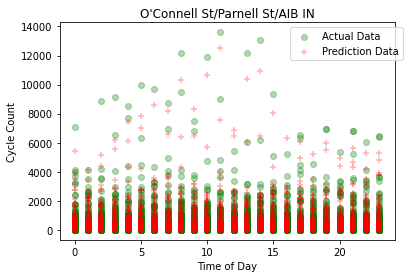

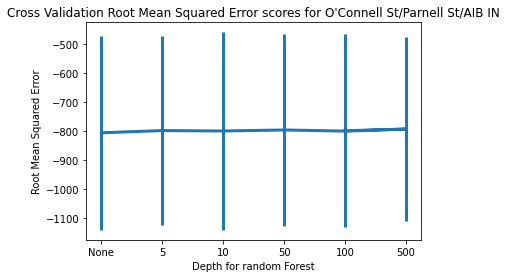

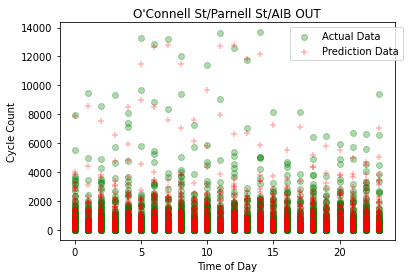

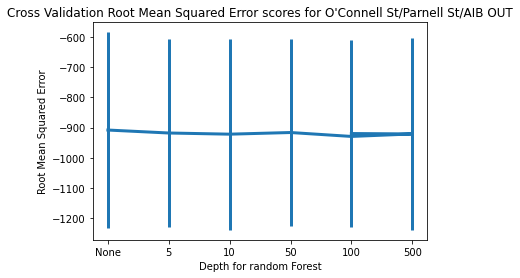

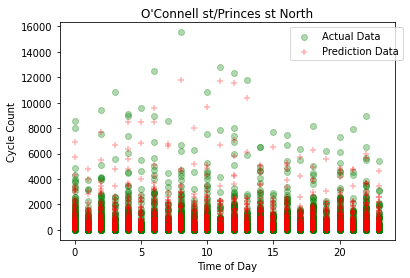

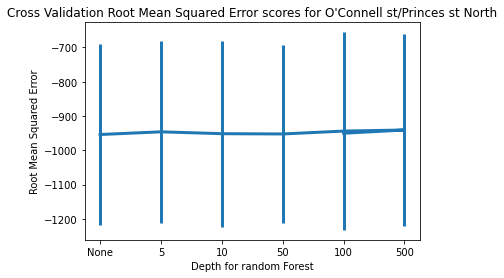

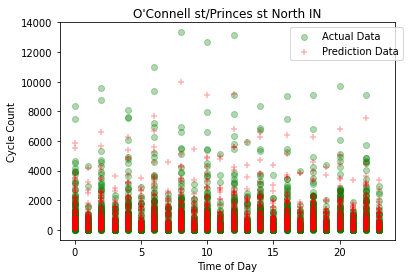

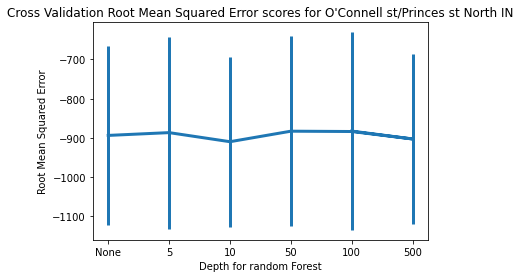

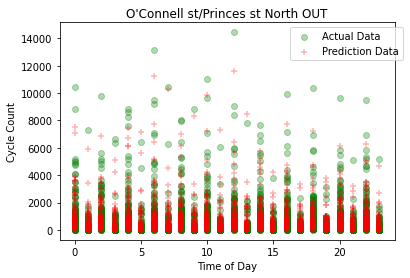

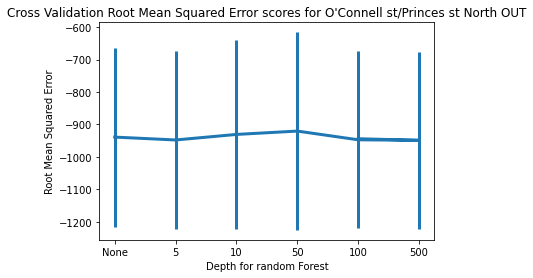

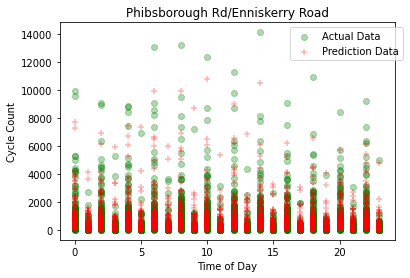

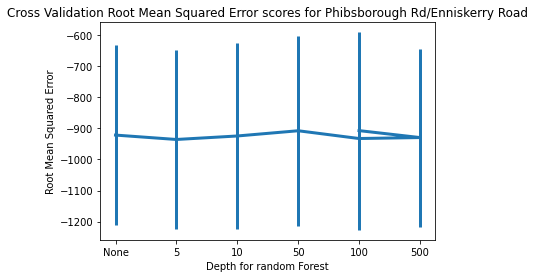

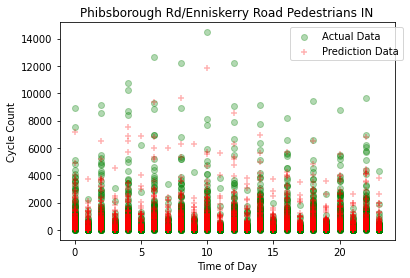

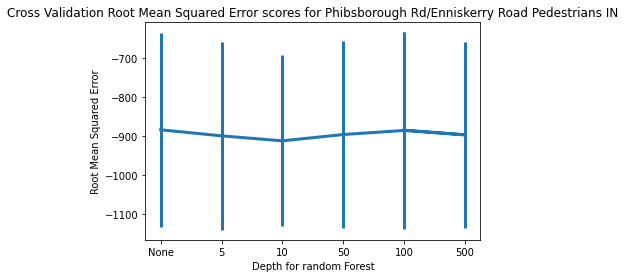

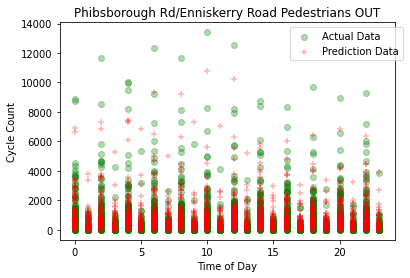

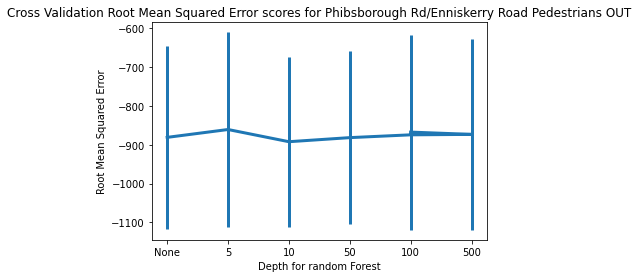

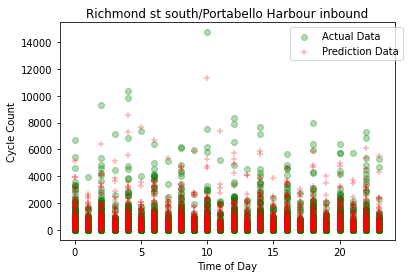

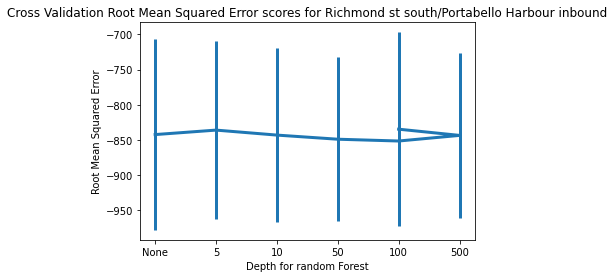

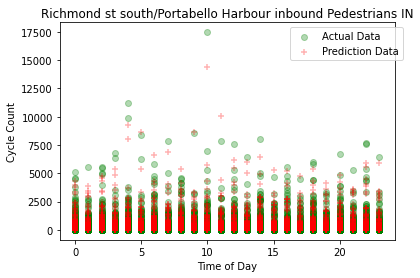

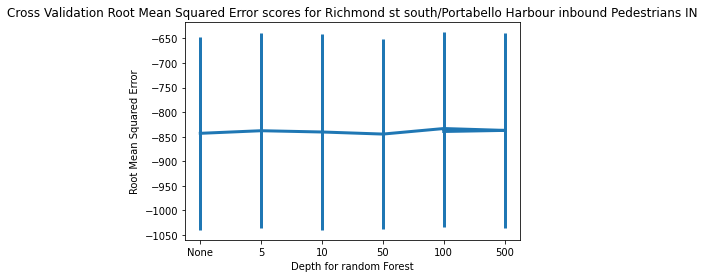

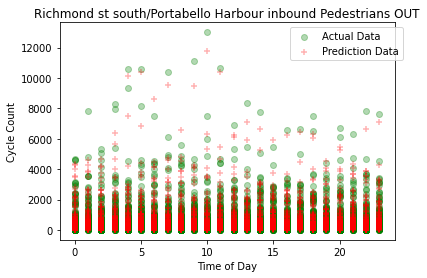

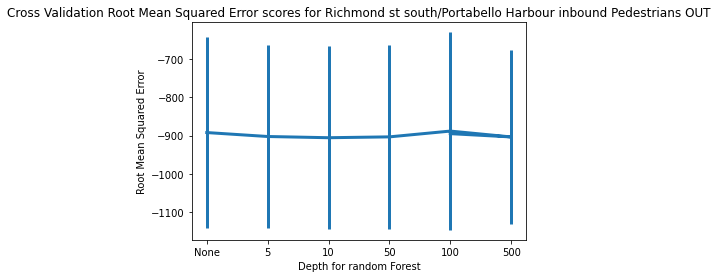

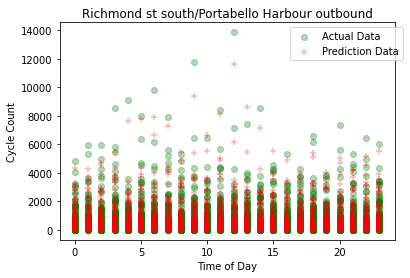

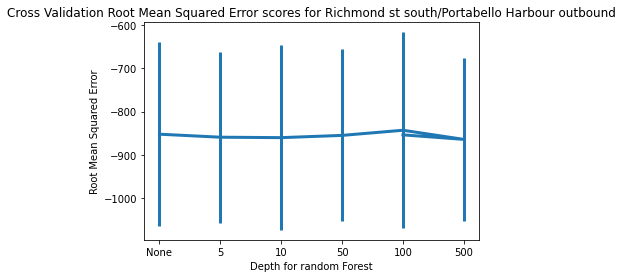

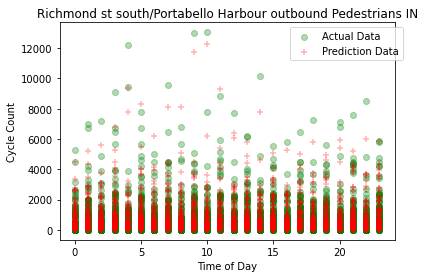

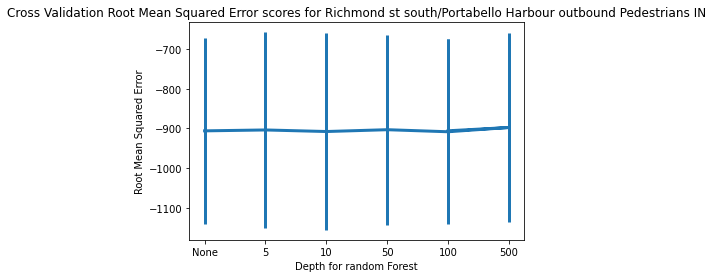

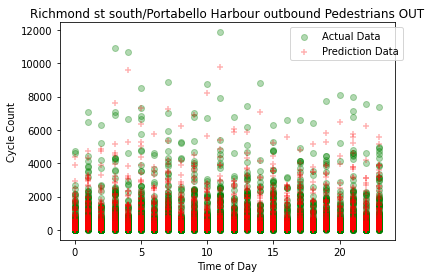

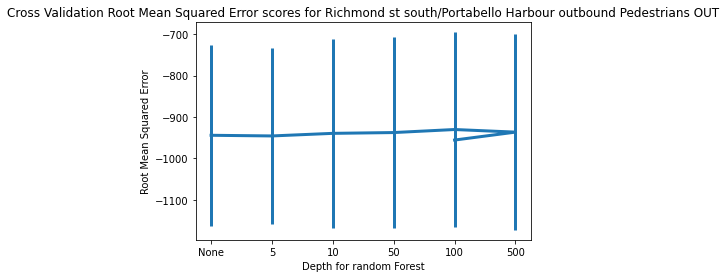

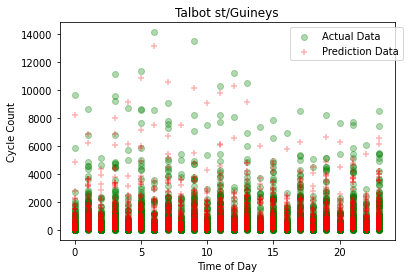

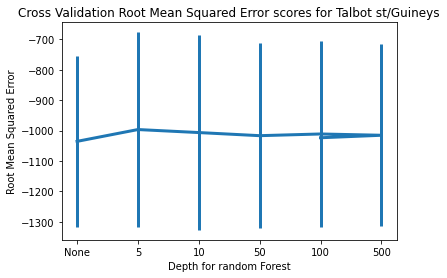

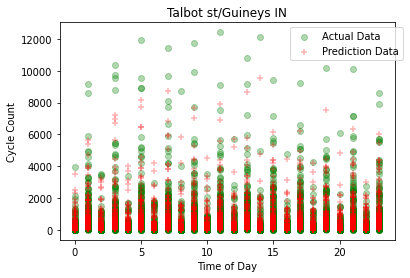

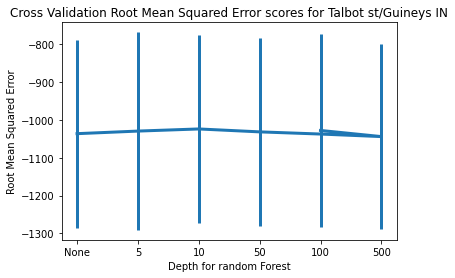

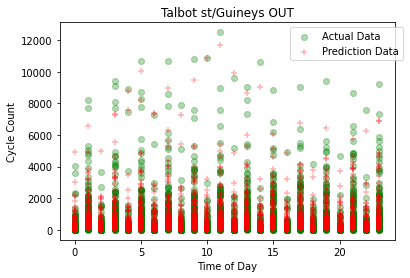

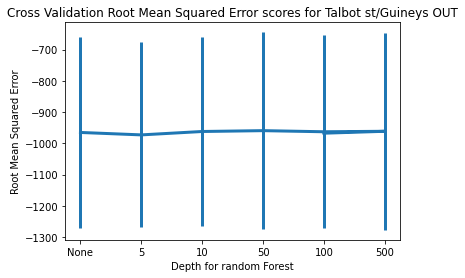

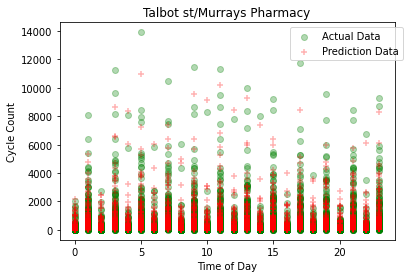

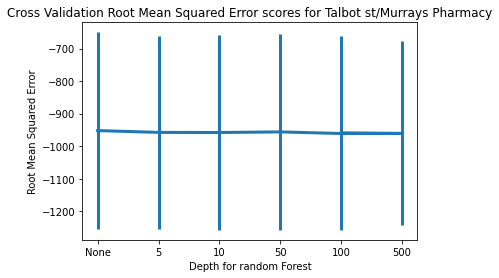

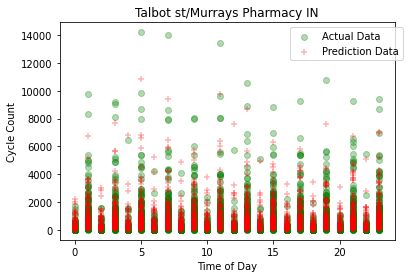

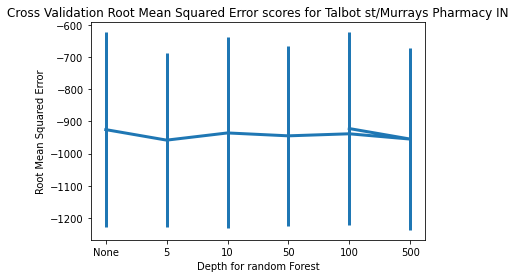

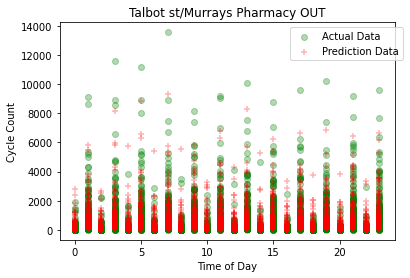

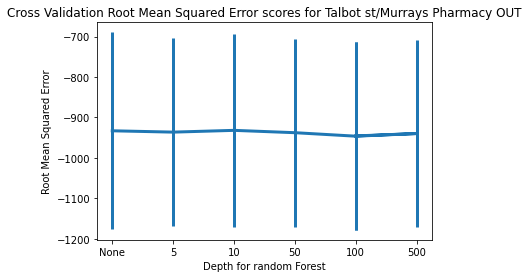

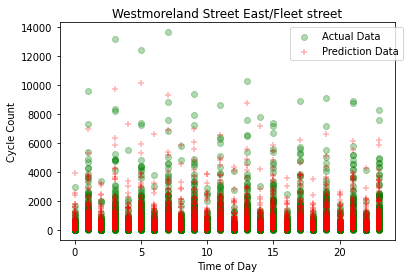

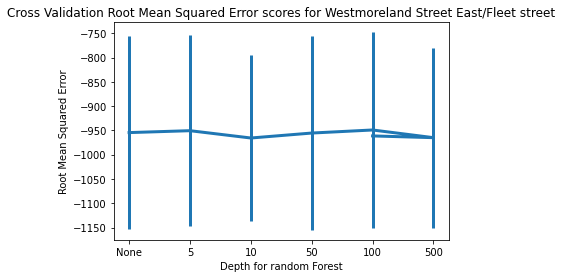

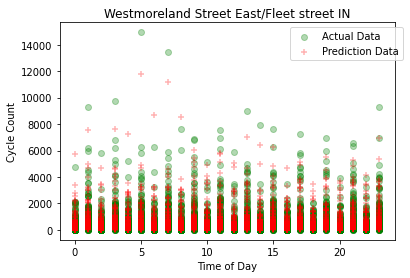

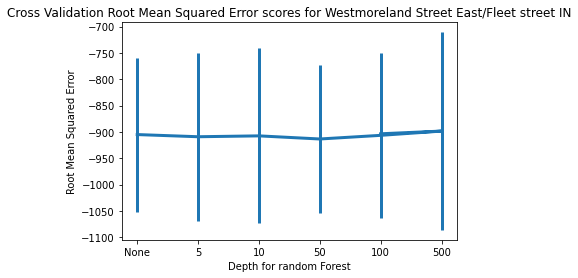

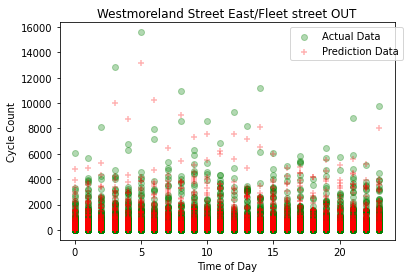

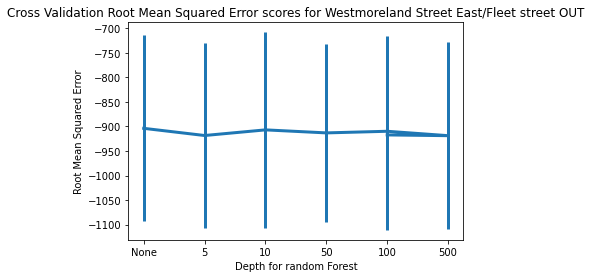

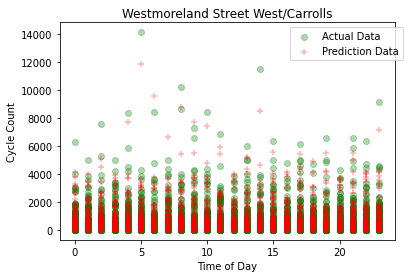

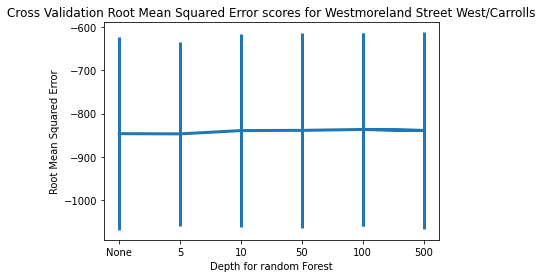

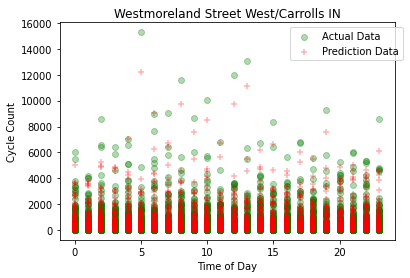

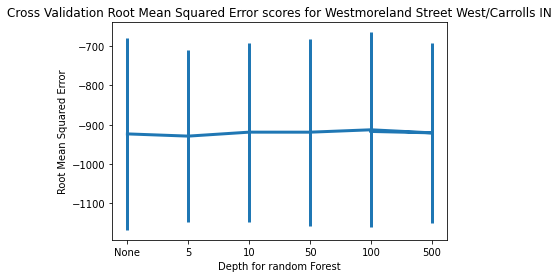

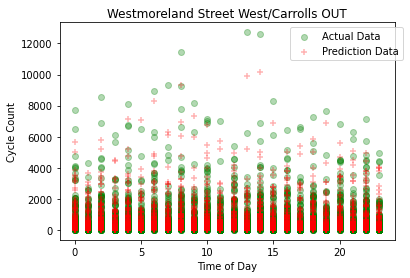

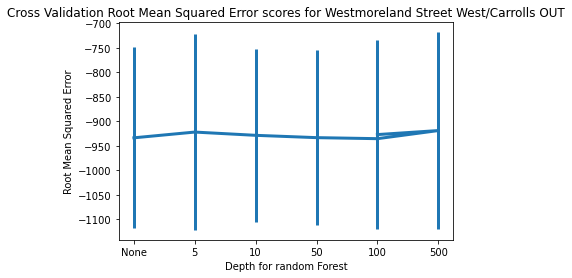

In [2]:
total_lots = len(df_label.columns)
print('total lots: ', total_lots)

import matplotlib.pyplot as plt
plt.close("all")

from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import SCORERS

X_plot = df_train['time_of_day'].values

all_scalers = {}

for i in range(total_lots):
    col_index = i
    fig_index = col_index * 10

    Y_plot = df_label.iloc[:,col_index].values
    title = df_label.columns[col_index]
    
    print(title)

    sub_plt = plt.figure(fig_index).add_subplot(111)
    actual_data_handler = sub_plt.scatter(x=X_plot, y=Y_plot, marker="o", color="Green", alpha=0.3)
    sub_plt.title.set_text(title)
    
    X_1 = df_train['time_of_day'].values.reshape(-1,1)
    X_2 = df_train['day_of_month'].values.reshape(-1,1)
    X_3 = df_train['month'].values.reshape(-1,1)
    X_4 = df_train['day_of_week_num'].values.reshape(-1,1)
    
    Y = df_label.iloc[:,col_index]
    X=np.column_stack((X_1,X_2,X_3, X_4))
    regr = RandomForestRegressor(max_depth=None)
    regr.fit(X,Y)
    Y_pred = regr.predict(X)
    print("Desicion Tree Score")
    print(regr.score(X,Y))
    dummy = DummyRegressor(strategy="mean")
    print("Dummy Mean Score")
    dummy.fit(X,Y)
    print(dummy.score(X,Y))
    mean_accuracy = []
    std_dev = []
    # scores = cross_val_score(regr, X, Y, cv=5, scoring='mean_squared_error')
    # mean_accuracy.append(np.array(scores).mean())
    # std_dev.append(np.array(scores).std())
    depth = [None, 5, 10, 50, 100, 500, 100]
    depth_str = ["None", "5", "10", "50", "100", "500", "100"]
    for each_depth in depth:
        model = RandomForestRegressor(max_depth=each_depth)
        model.fit(X,Y)
        cv_scores = cross_val_score(regr, X, Y, cv=5, scoring='neg_root_mean_squared_error')
        mean_accuracy.append(np.array(cv_scores).mean())
        std_dev.append(np.array(cv_scores).std())
    
    err_plot = plt.figure(fig_index + 1).add_subplot(111)
    err_plot.ticklabel_format(style='plain')
    err_plot.errorbar(depth_str,mean_accuracy,yerr=std_dev,linewidth=3)
    err_plot.set_xlabel('Depth for random Forest')
    err_plot.set_ylabel('Root Mean Squared Error')
    err_plot.title.set_text('Cross Validation Root Mean Squared Error scores for ' + title)

    
    pred_data_handler = sub_plt.scatter(x=X_plot, y=Y_pred, marker="+", color="Red", alpha=0.3)
    handlers_array = [actual_data_handler, pred_data_handler]
    scatter_labels_array = ["Actual Data", "Prediction Data",]
    sub_plt.legend(handlers_array, scatter_labels_array, bbox_to_anchor=(1.04,1))
    sub_plt.set_xlabel("Time of Day")
    sub_plt.set_ylabel("Cycle Count")